DSG WORK NOTEBOOK

CHAPTER 3 OF ISLR ATTEMPT IN PYTHON

14.99585287658263
0.7598135533532476
sarthakk


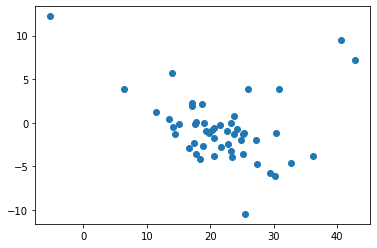

In [ ]:
## LAB 1 good fit

import numpy as np
import pandas as pd
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

df = pd.read_csv('https://raw.githubusercontent.com/mr-sarthakgupta/ISLR-BOSTON-EXAMPLE/main/boston.csv')

X = df[["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat"]]

y = df["medv"]

lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

lr.fit(X_train, y_train)

l = lr.predict(X_test)

k = r2_score(y_test, l)

m = mean_squared_error(y_test, l)

plt.figure(0)

plt.scatter(l, y_test - l)

print(m)

print(k)

print("sarthakk")

14.257338168909273
0.8055829447972191
sarthakk


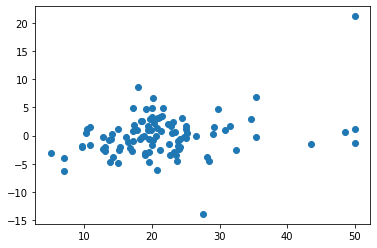

In [ ]:
##LAB 2 good fit

import numpy as np
import pandas as pd
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures   

df = pd.read_csv('https://raw.githubusercontent.com/mr-sarthakgupta/ISLR-BOSTON-EXAMPLE/main/boston.csv')

X = df[["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat"]]

y = df["medv"]

poly = PolynomialFeatures(2,interaction_only=False,include_bias = True)

lr = LinearRegression(fit_intercept=True, normalize=True)

n = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(n, y, test_size=0.2, random_state=42)

lr.fit(X_train, y_train)

l = lr.predict(X_test)

k = r2_score(y_test, l)

m = mean_squared_error(y_test, l)

plt.scatter(y_test, y_test - l)

print (m)

print(k)

print("sarthakk")

4.537005124619249
0.5875582992895003
sarthakk


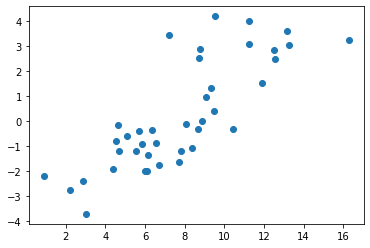

In [ ]:
##LAB 3 not so good fit

import numpy as np
import pandas as pd
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score 

df = pd.read_csv('https://raw.githubusercontent.com/mr-sarthakgupta/ISLR-BOSTON-EXAMPLE/main/Carseats.csv')

X = df[["CompPrice","Income","Advertising","Population","Price","Age","Education","Urban","US"]]

y = df["Sales"]

poly = PolynomialFeatures(1,interaction_only=False,include_bias = True)

n = poly.fit_transform(X)

lr = LinearRegression(fit_intercept=True, normalize = True)


X_train, X_test, y_train, y_test = train_test_split(n, y, test_size=0.1, random_state=42)

lr.fit(X_train, y_train)

l = lr.predict(X_test)

k = r2_score(y_test, l)

m = mean_squared_error(y_test, l)

plt.scatter(y_test, y_test - l)

print (m)

print(k)

print("sarthakk")

EXERCISES START HERE

doubts:- 11: d,          14: f


              
          

In [ ]:
def summary(X, y, y_predict, lr):
  from scipy import stats
  from sklearn.metrics import r2_score 
  from sklearn.metrics import mean_squared_error

  n = X.shape[0] 
  p = X.shape[1] 
  R2 = r2_score(y,y_predict) 
  adjusted_r2 = 1- (1-R2)*((n-1)/(n-p-1)) 
  RMSE = mean_squared_error(y,y_predict)**(1/2) 
  print("RMSE = ", RMSE) 
  print("R2 Score = ", R2)
  print("Adjusted R2 =" ,adjusted_r2) 

  weights = np.append(lr.intercept_,lr.coef_)

  #newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
  #MSE = (mean_squared_error(y, y_predict_tot))/(len(newX)-len(newX.columns))

  # Note if you don't want to use a DataFrame replace the two lines above with
  newX = np.append(np.ones((len(X),1)), X, axis=1)
  MSE = (sum((y-y_predict)**2))/(newX.shape[0]-newX.shape[1])


  var_b = MSE*(np.linalg.pinv(np.dot(newX.T,newX)).diagonal())
  sd_b = np.sqrt(var_b)
  ts_b = weights/ sd_b

  p_values =[2.0*(1.0-stats.t.cdf(np.abs(i),(newX.shape[0]-newX.shape[1]))) for i in ts_b]

  sd_b = np.round(sd_b,3)
  ts_b = np.round(ts_b,3)
  p_values = np.round(p_values,100)
  weights = np.round(weights,4)

  myDF3 = pd.DataFrame()
  myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [weights,sd_b,ts_b,p_values]
  print(myDF3)

  interval_95 = pd.DataFrame(np.column_stack((weights-2*sd_b, weights+2*sd_b)), columns=['LowerBound', 'UpperBound'])
  print('95 per intervals')
  print(interval_95)
  return

the prediction for horsepower = 98 is [24.53198762]
20.998084626703957
0.6470954259844197
            horsepower       mpg
horsepower    1.000000 -0.778427
mpg          -0.778427  1.000000
RMSE =  4.893675436963486
R2 Score =  0.6058759052626548
Adjusted R2 = 0.6048653306607641
   Coefficients  Standard Errors  t values  Probabilities
0       39.9844            0.718    55.722            0.0
1       -0.1577            0.006   -24.461            0.0
95 per intervals
   LowerBound  UpperBound
0     38.5484     41.4204
1     -0.1697     -0.1457
sarthakk


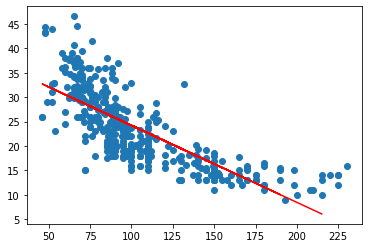

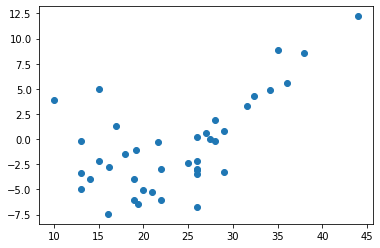

In [ ]:
## EXERCISE 8 

import numpy as np
import pandas as pd
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as st

df = pd.read_csv('https://raw.githubusercontent.com/mr-sarthakgupta/ISLR-BOSTON-EXAMPLE/main/Auto.csv')

X = df[['horsepower']]

y = df['mpg']

lr = LinearRegression(fit_intercept=True, normalize=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

lr.fit(X_train, y_train)

u = lr.predict(X_train)

l = lr.predict(X_test)

k = r2_score(y_test, l)

m = mean_squared_error(y_test, l)

f = np.array([[98]])

print("the prediction for horsepower = 98 is",lr.predict(f))

g = lr.predict(f)

plt.figure(0)

plt.scatter(X, y)

plt.plot(X_test, l, color ="red")

plt.figure(1)

plt.scatter(y_test, y_test - l)

print(m)

print(k)

dk = pd.DataFrame(df, columns = ["horsepower", "mpg"])

corr = dk.corr()

print(corr)

y_predict = lr.predict(X)

summary(X,y,y_predict,lr)

print("sarthakk")

19.48331181817744
0.667084454536051
            horsepower       mpg
horsepower    1.000000 -0.778427
mpg          -0.778427  1.000000
RMSE =  4.359359305811192
R2 Score =  0.687242312569506
Adjusted R2 = 0.6848240830275176
   Coefficients  Standard Errors  t values  Probabilities
0       57.6401            0.902    63.915            0.0
1        0.0000            0.902     0.000            1.0
2       -0.4769            0.031   -15.296            0.0
3        0.0013            0.000    10.391            0.0
95 per intervals
   LowerBound  UpperBound
0     55.8361     59.4441
1     -1.8040      1.8040
2     -0.5389     -0.4149
3      0.0013      0.0013
sarthakk


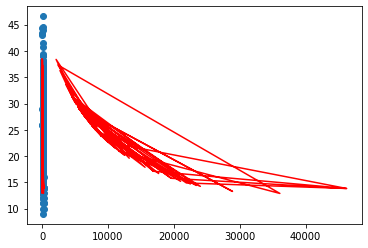

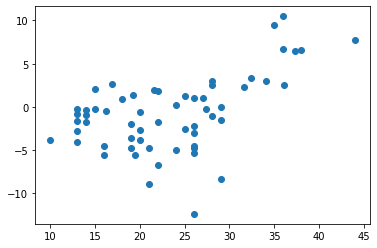

In [ ]:
lr = LinearRegression(fit_intercept=True, normalize=True)

poly = PolynomialFeatures(2,interaction_only=False,include_bias = True)

n = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(n, y, test_size=0.15, random_state=42)

lr.fit(X_train, y_train)

u = lr.predict(X_train)

l = lr.predict(X_test)

k = r2_score(y_test, l)

m = mean_squared_error(y_test, l)

plt.figure(0)

plt.scatter(X, y)

plt.plot(X_test, l, color ="red")

plt.figure(1)

plt.scatter(y_test, y_test - l)

print(m)

print(k)

dk = pd.DataFrame(df, columns = ["horsepower", "mpg"])

corr = dk.corr()

print(corr)

y_predict = lr.predict(n)

summary(n,y,y_predict,lr)

print("sarthakk")

a) i) As seen from the correlation matrix and also from the plot, there is certainly a relationship between the predictor and the response.

ii) The relationship between the predictor and
the response is moderately to highly strong as the correlation value is approximately -0.778.

iii) The relationship between the predictor and response is negative.

iv) 24.53198762 95% confidence intervals are: [21.9178, 27.1418].

c) On the right and left of the figure, the curve is "bending" but the linear model is not able to express it.

5.85103125
(-2.022690911734728, 2.022690911734728)
0.9016645695290153
sarthakk


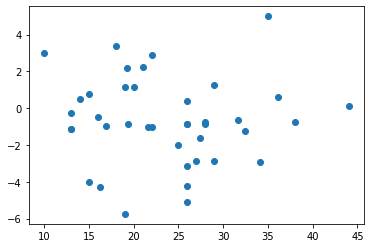

In [ ]:
## EXERCISE 9  
import scipy.stats as st
import numpy as np
import pandas as pd
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('https://raw.githubusercontent.com/mr-sarthakgupta/ISLR-BOSTON-EXAMPLE/main/Auto.csv')

newname = pd.get_dummies(df['name'])

s = df[['horsepower', 'cylinders','displacement','weight','year','origin','acceleration']]

X = np.hstack((s, newname))

y = df['mpg']

poly = PolynomialFeatures(2,interaction_only=False,include_bias = True)

n = poly.fit_transform(s)

lr = LinearRegression(fit_intercept=True, normalize=True)

X_train, X_test, y_train, y_test = train_test_split(n, y, test_size=0.1, random_state=42)

lr.fit(X_train, y_train)

l = lr.predict(X_test)

k = r2_score(y_test, l)

m = mean_squared_error(y_test, l)

plt.scatter(y_test, y_test-l)

print(m)

print(st.t.interval(alpha=0.95, df=len(l)-1))

print(k)

print("sarthakk")

In [ ]:
lr.fit(s,y)

y_predict = lr.predict(s)

summary(s,y,y_predict,lr)

RMSE =  3.293551418302203
R2 Score =  0.8214780764810599
Adjusted R2 = 0.8182237705835792
   Coefficients  Standard Errors  t values  Probabilities
0      -17.2184            4.644    -3.707   2.401841e-04
1       -0.0170            0.014    -1.230   2.196328e-01
2       -0.4934            0.323    -1.526   1.277965e-01
3        0.0199            0.008     2.647   8.444649e-03
4       -0.0065            0.001    -9.929   0.000000e+00
5        0.7508            0.051    14.729   0.000000e+00
6        1.4261            0.278     5.127   4.665681e-07
7        0.0806            0.099     0.815   4.154780e-01
95 per intervals
   LowerBound  UpperBound
0    -26.5064     -7.9304
1     -0.0450      0.0110
2     -1.1394      0.1526
3      0.0039      0.0359
4     -0.0085     -0.0045
5      0.6488      0.8528
6      0.8701      1.9821
7     -0.1174      0.2786


                   mpg  horsepower  cylinders  ...      year    origin  acceleration
mpg           1.000000   -0.778427  -0.777618  ...  0.580541  0.565209      0.423329
horsepower   -0.778427    1.000000   0.842983  ... -0.416361 -0.455171     -0.689196
cylinders    -0.777618    0.842983   1.000000  ... -0.345647 -0.568932     -0.504683
displacement -0.805127    0.897257   0.950823  ... -0.369855 -0.614535     -0.543800
weight       -0.832244    0.864538   0.897527  ... -0.309120 -0.585005     -0.416839
year          0.580541   -0.416361  -0.345647  ...  1.000000  0.181528      0.290316
origin        0.565209   -0.455171  -0.568932  ...  0.181528  1.000000      0.212746
acceleration  0.423329   -0.689196  -0.504683  ...  0.290316  0.212746      1.000000

[8 rows x 8 columns]


<Figure size 432x288 with 0 Axes>

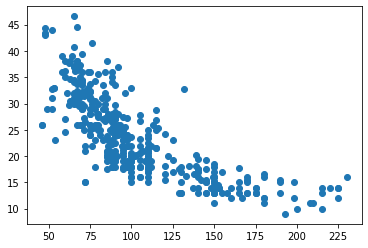

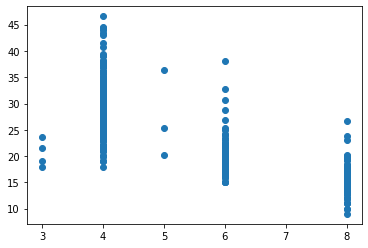

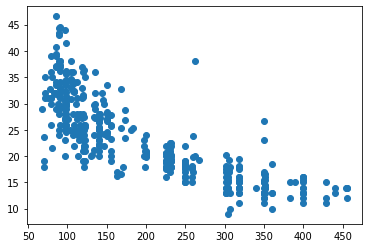

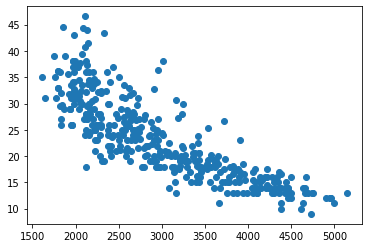

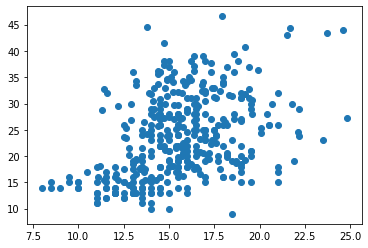

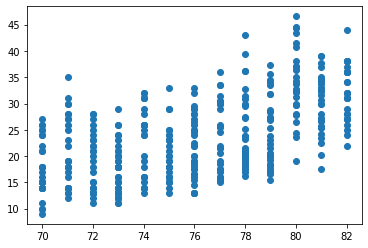

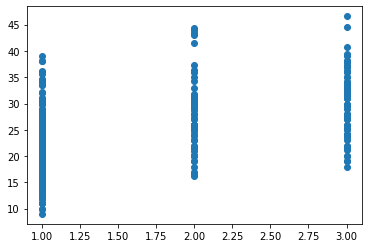

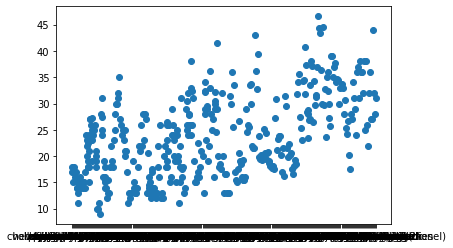

<Figure size 432x288 with 0 Axes>

In [ ]:
dk = pd.DataFrame(df, columns = ['mpg','horsepower', 'cylinders','displacement','weight','year','origin','acceleration'])

corr = dk.corr()

print(corr)

plt.figure(0)

plt.scatter(df['horsepower'], df['mpg'])

plt.figure(1)

plt.scatter(df['cylinders'], df['mpg'])

plt.figure(2)

plt.scatter(df['displacement'], df['mpg'])

plt.figure(3)

plt.scatter(df['weight'], df['mpg'])

plt.figure(4)

plt.scatter(df['acceleration'], df['mpg'])

plt.figure(5)

plt.scatter(df['year'], df['mpg'])

plt.figure(6)

plt.scatter(df['origin'] , df['mpg'])

plt.figure(7)

plt.scatter(df['name'], df['mpg'])

plt.figure(8)

c) i) Yes there is a relationship between the predictors and the response.

ii) The most statistically significant predictors appear to be displacement and weight.

iii) The coefficient of year suggest a moderate positive correlation between year and mpg.

d) The residual plot suggest that there is an outlier in the top right corner of the scatter.

f) I tried some functions like x^2, x^3, exp(-x) and log(x) on the predictors whose predictor-response plots seemed to look like the shapes of the aforementioned functions but that didn't seem to help with improving the r2 score metric.

     -1   1
0     0   1
1     0   1
2     0   1
3     0   1
4     0   1
..   ..  ..
395   0   1
396   1   0
397   0   1
398   0   1
399   0   1

[400 rows x 2 columns]
     -1   1
0     0   1
1     0   1
2     0   1
3     0   1
4     1   0
..   ..  ..
395   0   1
396   0   1
397   0   1
398   0   1
399   0   1

[400 rows x 2 columns]
5.943695969125345
R2 SCORE ON TRAING AND TEST RESPECTIVELY
0.23184553563953914
0.2234585897139224
[-0.1532393   0.1532393  -0.44776747  0.44776747 -0.05404569]
RMSE =  2.4601150143966657
R2 Score =  0.2392654363447584
Adjusted R2 = 0.22961144442019943
   Coefficients  Standard Errors      t values  Probabilities
0 -6.242681e+12            0.310 -2.013676e+13            0.0
1  9.877530e+10            0.211  4.686797e+11            0.0
2  9.877530e+10            0.202  4.894749e+11            0.0
3  6.143906e+12            0.202  3.035430e+13            0.0
4  6.143906e+12            0.202  3.041387e+13            0.0
5 -5.440000e-02            0.005 -1.0359

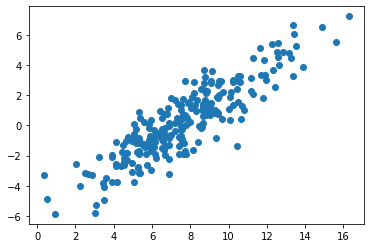

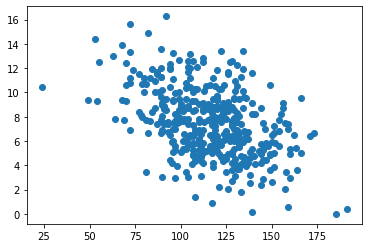

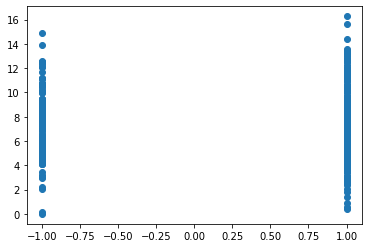

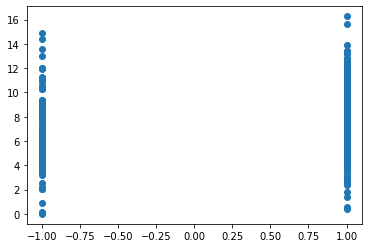

In [ ]:
## EXERCISE 10
import scipy.stats as st
import numpy as np
import pandas as pd
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('https://raw.githubusercontent.com/mr-sarthakgupta/ISLR-BOSTON-EXAMPLE/main/Carseats.csv')

print(pd.get_dummies(df["Urban"]))

print(pd.get_dummies(df["US"]))

a = pd.get_dummies(df["Urban"])

b = pd.get_dummies(df["US"])

k = df[["Price"]]

m = np.hstack((a, b))

X = np.hstack((m, k))

y = df["Sales"]

lr = LinearRegression(fit_intercept=True, normalize = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

lr.fit(X_train, y_train)

l = lr.predict(X_test)

p = lr.predict(X_train)

k = r2_score(y_test, l)

w = r2_score(y_train, p)

m = mean_squared_error(y_test, l)

plt.figure(0)

plt.scatter(y_test, y_test - l)

plt.figure(1)

plt.scatter(df["Price"],y)

plt.figure(2)

plt.scatter(df["Urban"],y)

plt.figure(3)

plt.scatter(df["US"],y)

print (m)

print("R2 SCORE ON TRAING AND TEST RESPECTIVELY")

print(w)

print(k)

print(lr.coef_)

lr.fit(X,y)

y_predict = lr.predict(X)

summary(X,y,y_predict,lr)

print("sarthakk")

b) For the first coefficient -0.1532393, it indicates a negative correlation between the price and sales, the coefficients for the dummies for Urban indicate positive correlation between no and sales and negative correlation between yes and sales. The coefficients for dummies for US indicate a positive correlation between no and sales and negative correlation between yes and sales.

y = -0.1532393*(price) + (0.1532393  -0.44776747)*(urban dummy vector) + (0.44776747 -0.05404569)*(US dummy vector)


R2 SCORE ON TRAING AND TEST RESPECTIVELY
0.6457756648329722
0.6622431732721609
0.12934273962000292
RMSE =  0.3732847181015768
R2 Score =  0.6592091685463028
Adjusted R2 = 0.6557317110824896
   Coefficients  Standard Errors  t values  Probabilities
0        0.0000            0.076     0.000            1.0
1        2.7669            0.136    20.349            0.0
95 per intervals
   LowerBound  UpperBound
0     -0.1520      0.1520
1      2.4949      3.0389
sarthakk


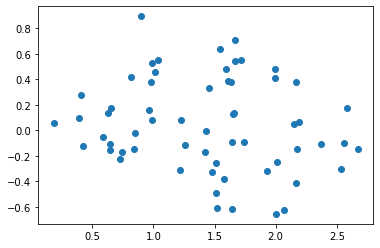

In [ ]:
## EXERCISE 11

import numpy as np
import pandas as pd
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(4385)

X = np.random.rand(100)

np.random.seed(1)

y = 2*X + np.random.rand(100)

a = X.reshape(-1, 1)

b = y.reshape(-1, 1)

lr = LinearRegression(fit_intercept=False, normalize = True, )

X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.6, random_state=42)

lr.fit(X_train, y_train)

l = lr.predict(X_test)

p = lr.predict(X_train)

k = r2_score(y_test, l)

w = r2_score(y_train, p)

m = mean_squared_error(y_test, l)

plt.figure(0)

plt.scatter(y_test, y_test - l)

print("R2 SCORE ON TRAING AND TEST RESPECTIVELY")

print(w)

print(k)

print(m)

lr.fit(a,b)

y_predict = lr.predict(a)

summary(a,b,y_predict,lr)

## t-statistic, p-value remaining 

print("sarthakk")

R2 SCORE ON TRAING AND TEST RESPECTIVELY
0.7773793503317077
0.7690257725000981
0.016798054315524173
RMSE =  0.1311407299371815
R2 Score =  0.7763832450645486
Adjusted R2 = 0.7741014414427583
   Coefficients  Standard Errors  t values  Probabilities
0        0.0000            0.033     0.000            1.0
1        0.3415            0.021    16.484            0.0
95 per intervals
   LowerBound  UpperBound
0     -0.0660      0.0660
1      0.2995      0.3835
sarthakk


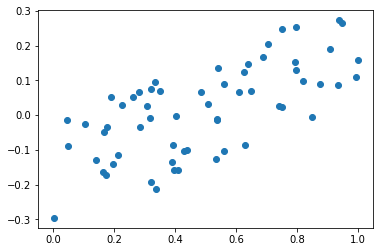

In [ ]:
import numpy as np
import pandas as pd
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(4385)

X = np.random.rand(100)

np.random.seed(1)

y = 2*X + np.random.rand(100)

a = X.reshape(-1, 1)

b = y.reshape(-1, 1)

lr = LinearRegression(fit_intercept=False, normalize = True, )

X_train, X_test, y_train, y_test = train_test_split(b, a, test_size=0.6, random_state=42)

lr.fit(X_train, y_train)

l = lr.predict(X_test)

p = lr.predict(X_train)

k = r2_score(y_test, l)

w = r2_score(y_train, p)

m = mean_squared_error(y_test, l)

plt.figure(0)

plt.scatter(y_test, y_test - l)

print("R2 SCORE ON TRAING AND TEST RESPECTIVELY")

print(w)

print(k)

print(m)

lr.fit(b,a)

y_predict = lr.predict(b)

summary(b,a,y_predict,lr)

## t-statistic, p-value remaining 

print("sarthakk")

e) here the entire given expression in part d remains the same if we interchange xi and yi, hence it would remain same for both cases.

R2 SCORE ON TRAING AND TEST RESPECTIVELY
0.992633795633622
0.9942393321098769
0.12739248896900032
[[16.77552356]]


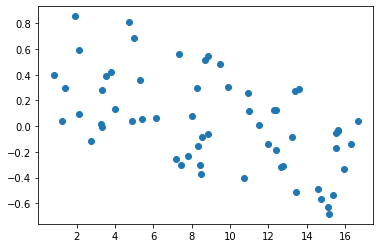

In [ ]:
## EXERCISE 12

import numpy as np
import pandas as pd
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(19380)

X = np.random.rand(100)

np.random.seed(1)

y = 16*X + np.random.rand(100)

a = X.reshape(-1, 1)

b = y.reshape(-1, 1)

lr = LinearRegression(fit_intercept=False, normalize = True, )

X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.6, random_state=42)

lr.fit(X_train, y_train)

l = lr.predict(X_test)

p = lr.predict(X_train)

k = r2_score(y_test, l)

w = r2_score(y_train, p)

m = mean_squared_error(y_test, l)

plt.figure(0)

plt.scatter(y_test, y_test - l)

print("R2 SCORE ON TRAING AND TEST RESPECTIVELY")

print(w)

print(k)

print(m)

print(lr.coef_)

R2 SCORE ON TRAING AND TEST RESPECTIVELY
0.9998217095272006
0.9998823170432564
9.242288469804944e-06
[[1.0073533]]
R2 SCORE ON TRAING AND TEST RESPECTIVELY
0.999757139606804
0.9997615088325287
1.8619577254455688e-05
[[0.99266169]]


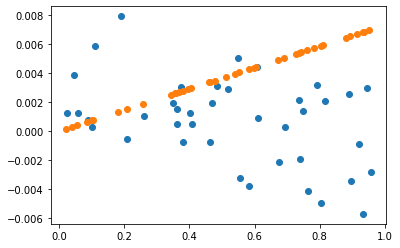

In [ ]:
## regression of x on y and of y on x

import numpy as np
import pandas as pd
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(1938073)

X = np.random.rand(100)

np.random.seed(1)

y = X + 0.01*np.random.rand(100)

a = X.reshape(-1, 1)

b = y.reshape(-1, 1)

lr = LinearRegression(fit_intercept=False, normalize = True)

X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.4, random_state=42)

lr.fit(X_train, y_train)

l = lr.predict(X_test)

p = lr.predict(X_train)

k = r2_score(y_test, l)

w = r2_score(y_train, p)

m = mean_squared_error(y_test, l)

plt.figure(0)

plt.scatter(y_test, y_test - l)

print("R2 SCORE ON TRAING AND TEST RESPECTIVELY")

print(w)

print(k)

print(m)

print(lr.coef_)

x_train, x_test, Y_train, Y_test = train_test_split(b, a, test_size=0.4, random_state=42)

kr = LinearRegression(fit_intercept=False, normalize = True)

kr.fit(x_train, Y_train)

d = kr.predict(X_test)

q = kr.predict(X_train)

h = r2_score(Y_test, d)

g = r2_score(Y_train, q)

me = mean_squared_error(Y_test, d)

plt.figure(0)

plt.scatter(Y_test, Y_test - d)

print("R2 SCORE ON TRAING AND TEST RESPECTIVELY")

print(g)

print(h)

print(me)

print(kr.coef_)


the coefficients will be same when 
summation of (xi)^2 = summation of (yi)^2 

R2 SCORE ON TRAING AND TEST RESPECTIVELY
0.9596804168505664
0.9582191739550949
0.00968035279037063
[[0.5100443]]
confidence interval is  
RMSE =  0.09281592052012812
R2 Score =  0.9593715053005198
Adjusted R2 = 0.9589569288239945
   Coefficients  Standard Errors  t values  Probabilities
0       -0.9853            0.009  -104.844            0.0
1        0.5095            0.011    48.105            0.0
95 per intervals
   LowerBound  UpperBound
0     -1.0033     -0.9673
1      0.4875      0.5315


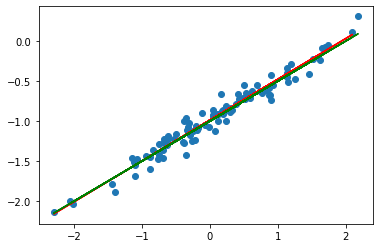

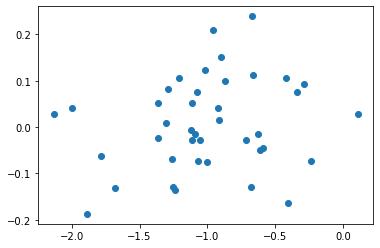

In [ ]:
## EXERCISE 13

import numpy as np
import pandas as pd
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(1)

X = np.random.normal(0, 1, 100)

a = X.reshape(-1, 1)

eps = np.random.normal(0, 0.1, 100)

Y = -1 + 0.5*X + eps

b = Y.reshape(-1, 1)

lr = LinearRegression(fit_intercept=True, normalize = True)

poly = PolynomialFeatures(2,interaction_only=False, include_bias = True)

n = poly.fit_transform(a)

X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.4, random_state=42)

lr.fit(X_train, y_train)

l = lr.predict(X_test)

p = lr.predict(X_train)

k = r2_score(y_test, l)

w = r2_score(y_train, p)

m = mean_squared_error(y_test, l)

plt.figure(0)

plt.scatter(X, Y)

plt.plot(X_test, l, color = "red")

plt.plot(X, -1 + 0.5*X, color = "green")

plt.figure(1)

plt.scatter(y_test, y_test - l)

print("R2 SCORE ON TRAING AND TEST RESPECTIVELY")

print(w)

print(k)

print(m)

print(lr.coef_)

print("confidence interval is  ")

lr.fit(a,b)

y_predict = lr.predict(a)

summary(a,b,y_predict,lr)

R2 SCORE ON TRAING AND TEST RESPECTIVELY
0.24804490161681636
0.23665597789670678
0.9680352790370634
[[0.60044302]]
confidence interval is  
RMSE =  0.9281592052012811
R2 Score =  0.2438233943025615
Adjusted R2 = 0.23610730648932243
   Coefficients  Standard Errors  t values  Probabilities
0       -0.8530            0.094    -9.076   1.221245e-14
1        0.5954            0.106     5.621   1.785033e-07
95 per intervals
   LowerBound  UpperBound
0     -1.0410     -0.6650
1      0.3834      0.8074


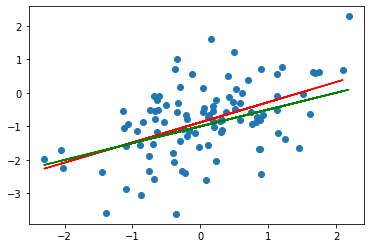

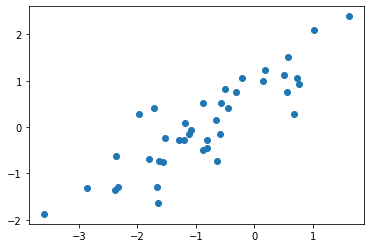

In [ ]:
## HIGH NOISE

import numpy as np
import pandas as pd
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(1)

X = np.random.normal(0, 1, 100)

a = X.reshape(-1, 1)

eps = np.random.normal(0, 0.1, 100)

Y = -1 + 0.5*X + 10*eps

b = Y.reshape(-1, 1)

lr = LinearRegression(fit_intercept=True, normalize = True)

poly = PolynomialFeatures(2,interaction_only=False, include_bias = True)

n = poly.fit_transform(a)

X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.4, random_state=42)

lr.fit(X_train, y_train)

l = lr.predict(X_test)

p = lr.predict(X_train)

k = r2_score(y_test, l)

w = r2_score(y_train, p)

m = mean_squared_error(y_test, l)

plt.figure(0)

plt.scatter(X, Y)

plt.plot(X_test, l, color = "red")

plt.plot(X, -1 + 0.5*X, color = "green")

plt.figure(1)

plt.scatter(y_test, y_test - l)

print("R2 SCORE ON TRAING AND TEST RESPECTIVELY")

print(w)

print(k)

print(m)

print(lr.coef_)

print("confidence interval is  ")

lr.fit(a,b)

y_predict = lr.predict(a)

summary(a,b,y_predict,lr)

R2 SCORE ON TRAING AND TEST RESPECTIVELY
0.9995647557895219
0.9995489387257999
9.680352790370689e-05
[[0.50100443]]
confidence interval is  
RMSE =  0.00928159205201281
R2 Score =  0.9995620558784128
Adjusted R2 = 0.9995575870608456
   Coefficients  Standard Errors  t values  Probabilities
0       -0.9985            0.001 -1062.519            0.0
1        0.5010            0.001   472.943            0.0
95 per intervals
   LowerBound  UpperBound
0     -1.0005     -0.9965
1      0.4990      0.5030


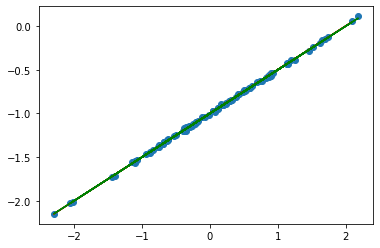

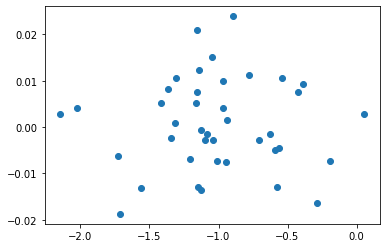

In [ ]:
## LOW NOISE

import numpy as np
import pandas as pd
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(1)

X = np.random.normal(0, 1, 100)

a = X.reshape(-1, 1)

eps = np.random.normal(0, 0.1, 100)

Y = -1 + 0.5*X + 0.1*eps

b = Y.reshape(-1, 1)

lr = LinearRegression(fit_intercept=True, normalize = True)

poly = PolynomialFeatures(2,interaction_only=False, include_bias = True)

n = poly.fit_transform(a)

X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.4, random_state=42)

lr.fit(X_train, y_train)

l = lr.predict(X_test)

p = lr.predict(X_train)

k = r2_score(y_test, l)

w = r2_score(y_train, p)

m = mean_squared_error(y_test, l)

plt.figure(0)

plt.scatter(X, Y)

plt.plot(X_test, l, color = "red")

plt.plot(X, -1 + 0.5*X, color = "green")

plt.figure(1)

plt.scatter(y_test, y_test - l)

print("R2 SCORE ON TRAING AND TEST RESPECTIVELY")

print(w)

print(k)

print(m)

print(lr.coef_)

print("confidence interval is  ")

lr.fit(a,b)

y_predict = lr.predict(a)

summary(a,b,y_predict,lr)

the predicted coefficients are quite similar to the actual coefficients and including polynomial term won't help much as the model generating the data is linear only.

Reducing noise results in smaller confidence intervals as it becomes much easier to predict the target variable as its correlation with the predictor is much higher. And we see opposite of these results when we increase the noise. 

1.0
1.0
7.56990924650083e-27
          0         1         2
0  1.000000  0.999995  1.000000
1  0.999995  1.000000  0.999996
2  1.000000  0.999996  1.000000
RMSE =  0.08942940599160647
R2 Score =  0.9999907668437167
Adjusted R2 = 0.9999906726278363
   Coefficients  Standard Errors  t values  Probabilities
0        0.0079            0.009     0.878       0.382017
1        0.4998            0.000  3257.886       0.000000
95 per intervals
   LowerBound  UpperBound
0     -0.0101      0.0259
1      0.4998      0.4998


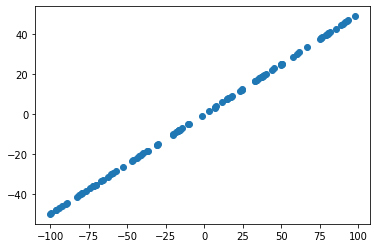

In [ ]:
## EXERCISE 14

import numpy as np
import pandas as pd
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(1)

x1 = np.random.uniform(low = -100, high = 100, size = 100)

x2 = 0.5*x1 + np.random.normal(0, 0.1, 100)

y = 2 + 2*x1 + 0.3*x2 + np.random.normal(0, 0.1, 100)

a = x1.reshape(-1, 1)

b = x2.reshape(-1, 1)

c = y.reshape(-1, 1)

d = np.hstack((a, b, c))

lr = LinearRegression(fit_intercept=True, normalize = True)

X_train, X_test, y_train, y_test = train_test_split(d, c, test_size=0.4, random_state=42)

lr.fit(X_train, y_train)

l = lr.predict(X_test)

p = lr.predict(X_train)

k = r2_score(y_test, l)

w = r2_score(y_train, p)

plt.figure(0)

plt.scatter(x1, x2)

m = mean_squared_error(y_test, l)

print(w)

print(k)

print(m)

dk = pd.DataFrame(d)

corr = dk.corr()

print(corr)

lr.fit(a,b)

y_predict = lr.predict(a)

summary(a,b,y_predict,lr)

1.0
1.0
5.503170636861312e-27
          0         1         2
0  1.000000  0.999991  1.000000
1  0.999991  1.000000  0.999992
2  1.000000  0.999992  1.000000
RMSE =  0.12194026633186977
R2 Score =  0.9999826628063794
Adjusted R2 = 0.9999824876832115
   Coefficients  Standard Errors  t values  Probabilities
0       -0.0837            0.012    -6.822   7.217571e-10
1        0.4998            0.000  2389.596   0.000000e+00
95 per intervals
   LowerBound  UpperBound
0     -0.1077     -0.0597
1      0.4998      0.4998


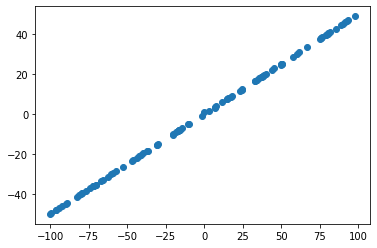

In [ ]:
import numpy as np
import pandas as pd
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(1)

x1 = np.random.uniform(low = -100, high = 100, size = 100)

t = np.append(x1, [0.1])

x2 = 0.5*x1 + np.random.normal(-0.1, 0.1, 100)

u = np.append(x2, [0.8])

y = 2 + 2*t + 0.3*u + np.random.normal(-0.1, 0.1, 101)

a = t.reshape(-1, 1)

b = u.reshape(-1, 1)

c = y.reshape(-1, 1)

d = np.hstack((a, b, c))

lr = LinearRegression(fit_intercept=True, normalize = True)

X_train, X_test, y_train, y_test = train_test_split(d, c, test_size=0.4, random_state=42)

lr.fit(X_train, y_train)

l = lr.predict(X_test)

p = lr.predict(X_train)

k = r2_score(y_test, l)

w = r2_score(y_train, p)

plt.figure(0)

plt.scatter(t, u)

m = mean_squared_error(y_test, l)

print(w)

print(k)

print(m)

dk = pd.DataFrame(d)

corr = dk.corr()

print(corr)

lr.fit(a,b)

y_predict = lr.predict(a)

summary(a,b,y_predict,lr)

the correlation between x1 and x2 is 0.999995.

because of so high correlations, we can reject the null hypothesis.

g) These do not seem to form outliers.

R2 SCORE ON TRAING AND TEST RESPECTIVELY
0.6483575063935333
0.775426138342634
12.881506105708741
             crim     indus       nox  ...        zn      chas   ptratio
crim     1.000000  0.406583  0.420972  ... -0.200469 -0.055892  0.289946
indus    0.406583  1.000000  0.763651  ... -0.533828  0.062938  0.383248
nox      0.420972  0.763651  1.000000  ... -0.516604  0.091203  0.188933
rm      -0.219247 -0.391676 -0.302188  ...  0.311991  0.091251 -0.355501
age      0.352734  0.644779  0.731470  ... -0.569537  0.086518  0.261515
dis     -0.379670 -0.708027 -0.769230  ...  0.664408 -0.099176 -0.232471
rad      0.625505  0.595129  0.611441  ... -0.311948 -0.007368  0.464741
tax      0.582764  0.720760  0.668023  ... -0.314563 -0.035587  0.460853
black   -0.385064 -0.356977 -0.380051  ...  0.175520  0.048788 -0.177383
lstat    0.455621  0.603800  0.590879  ... -0.412995 -0.053929  0.374044
medv    -0.388305 -0.483725 -0.427321  ...  0.360445  0.175260 -0.507787
zn      -0.200469 -0.533828

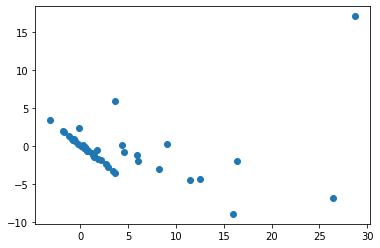

In [ ]:
## EXERCISE 15

import numpy as np
import pandas as pd
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('https://raw.githubusercontent.com/mr-sarthakgupta/ISLR-BOSTON-EXAMPLE/main/boston.csv')

X = df[["medv","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat"]]

y = df["crim"]

lr = LinearRegression()

poly = PolynomialFeatures(2,interaction_only=True,include_bias = True)

n = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(n, y, test_size=0.09, random_state=42)

lr.fit(X_train, y_train)

l = lr.predict(X_test)

p = lr.predict(X_train)

k = r2_score(y_test, l)

w = r2_score(y_train, p)

m = mean_squared_error(y_test, l)

print("R2 SCORE ON TRAING AND TEST RESPECTIVELY")

plt.scatter(l, y_test - l)

print(w)

print(k)

print(m)

dk = pd.DataFrame(df, columns = ["crim","indus","nox","rm","age","dis","rad","tax","black","lstat","medv","zn","chas","ptratio"])

corr = dk.corr()

print(corr)

print("sarthakk")

medv- 0.18565449648035903- good on 3rd order

zn- 0.04355351653217843 x

indus- 0.19378704453302054

chas- 0.008773299509816868 x

nox- 0.28809034163200886

rm- 0.0910490105447983

age- 0.19649016717576728

dis- 0.1994352733221444

rad- 0.4546814158267519- ok ok on 3rd order

tax- 0.3737295273509884

ptratio- 0.08513137366544554x

black- 0.2642906620375084

lstat- 0.4058512950926014

These are the r2 scores when these predictors were taken for lr individually and wether they might have a non linear cubic association is also indicated.

b) Yes, we can reject the null hypothesis.